In [59]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [61]:
def flatten_data_for_BERT(file_directory):

    with open(file_directory, 'r') as file:
        data = json.load(file)

    flattened_data = []

    # iterate through each entry in the data
    for entry in data:
        question_id = entry['id']
        ambiguous_question = entry['question']

        # check the type of annotations and process accordingly
        for annotation in entry['annotations']:
            if annotation['type'] == 'multipleQAs':
                flattened_data.append({
                    'ambiguous_question': ambiguous_question,
                    'ambig_class': 1
                })
                # for qa_pair in annotation['qaPairs']:
                #     flattened_data.append({
                #         'ambiguous_question': qa_pair['question'],
                #         'ambig_class': 0
                #     })
            elif annotation['type'] == 'singleAnswer':
                flattened_data.append({
                    'ambiguous_question': ambiguous_question,
                    'ambig_class': 0
                })

    ambiguous_df = pd.DataFrame(flattened_data)
    return ambiguous_df

In [62]:
train_df = flatten_data_for_BERT('../../data/LARGE/train.json')
train_df = train_df.dropna()
print(len(train_df))
train_df.head()

10251


,ambiguous_question,ambig_class
0,When did the simpsons first air on television?,1
1,Who played george washington in the john adams...,0
2,What is the legal age of marriage in usa?,1
3,Who starred in barefoot in the park on broadway?,1
4,When did the manhattan project began and end?,1


In [63]:
num_0s = len(train_df.loc[train_df['ambig_class']==0])
num_1s = len(train_df.loc[train_df['ambig_class']==1])
print("Number of unambiguous questions: ", num_0s)
print("Number of ambiguous questions: ", num_1s)

Number of unambiguous questions:  5459
Number of ambiguous questions:  4792


In [64]:
dev_df = flatten_data_for_BERT('../../data/LIGHT/dev_light.json')
dev_df = dev_df.dropna()
dev_df.head()

,ambiguous_question,ambig_class
0,Who plays the doctor in dexter season 1?,0
1,How often does spermatogeneis—the production o...,0
2,How often does spermatogeneis—the production o...,0
3,When was the first remote control tv invented?,0
4,When was the first remote control tv invented?,0


In [65]:
num_0s = len(dev_df.loc[dev_df['ambig_class']==0])
num_1s = len(dev_df.loc[dev_df['ambig_class']==1])
print("Number of unambiguous questions: ", num_0s)
print("Number of ambiguous questions: ", num_1s)

Number of unambiguous questions:  1776
Number of ambiguous questions:  1536


In [66]:
def catgorize_question_type(df):
    # df['question_type'] = df['ambiguous_question'].str.split().str[0]
    # return df
    
    standard_types = ['Who', 'What', 'Where', 'When', 'How']

    # Extract the first word and categorize
    df['question_type'] = df['ambiguous_question'].str.split().str[0]
    df['question_type'] = df['question_type'].apply(lambda x: x if x in standard_types else 'Other')

    return df

results_df = catgorize_question_type(train_df)
results_df.head()

,ambiguous_question,ambig_class,question_type
0,When did the simpsons first air on television?,1,When
1,Who played george washington in the john adams...,0,Who
2,What is the legal age of marriage in usa?,1,What
3,Who starred in barefoot in the park on broadway?,1,Who
4,When did the manhattan project began and end?,1,When


In [72]:
results_df_copy = results_df.copy()
results_df_copy = results_df_copy.drop_duplicates(subset='ambiguous_question')
print(list(results_df_copy['question_type'].unique()))
results_df_copy.head()

['When', 'Who', 'What', 'Other', 'Where', 'How']


,ambiguous_question,ambig_class,question_type
0,When did the simpsons first air on television?,1,When
1,Who played george washington in the john adams...,0,Who
2,What is the legal age of marriage in usa?,1,What
3,Who starred in barefoot in the park on broadway?,1,Who
4,When did the manhattan project began and end?,1,When


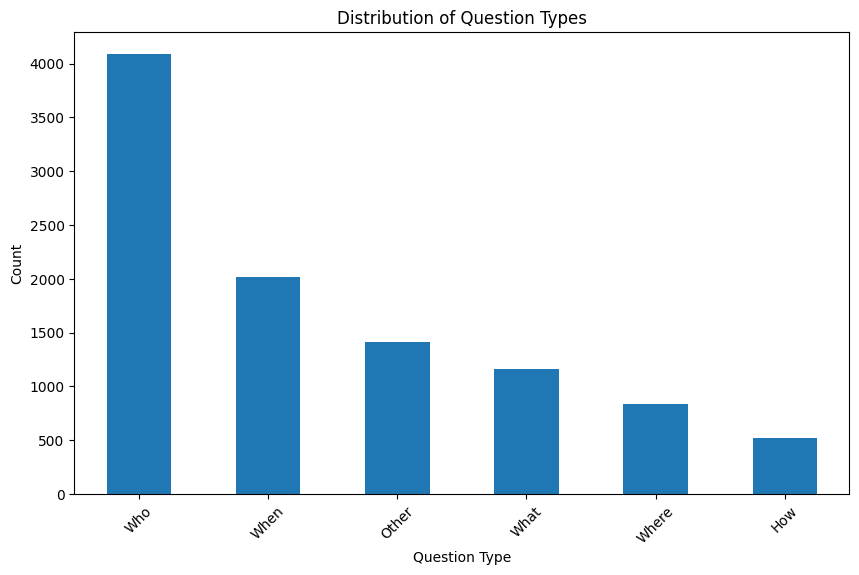

In [73]:
def plot_question_type_distribution(df):
    
    question_type_counts = df['question_type'].value_counts()

    # Plotting the bar graph
    plt.figure(figsize=(10, 6))
    question_type_counts.plot(kind='bar')
    plt.title('Distribution of Question Types')
    plt.xlabel('Question Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
plot_question_type_distribution(results_df_copy)

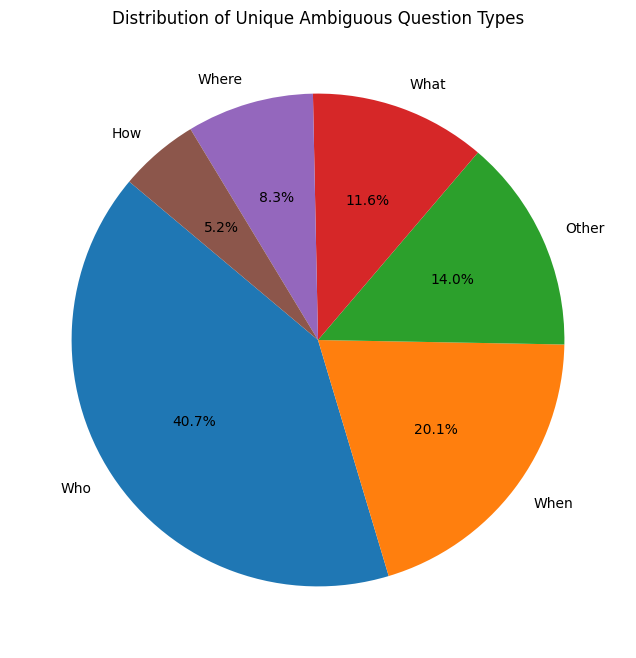

In [77]:
def plot_question_type_pie_chart(df):
    """
    This function takes a pandas DataFrame with a column named 'question_type'
    and plots a pie chart showing the distribution of different question types.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the 'question_type' column.
    """
    # Check if 'question_type' column exists
    if 'question_type' not in df.columns:
        raise ValueError("DataFrame must contain a column named 'question_type'.")

    # Count the occurrences of each question type
    question_type_counts = df['question_type'].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(10, 8))
    question_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Unique Ambiguous Question Types')
    plt.ylabel('')  # Hide the y-label
    plt.show()
    
plot_question_type_pie_chart(results_df_copy)

In [78]:
def stratified_split(df, stratify_col, test_size):
    train_df, test_df = train_test_split(df, test_size = test_size, stratify=df[stratify_col])
    return train_df, test_df

train_df, test_df = stratified_split(results_df_copy, 'question_type', 0.34483738)

In [88]:
train_df = train_df.drop(columns='question_type')
print(len(train_df))
train_df.head()

6575


,ambiguous_question,ambig_class
745,Which country is opposite to india on globe?,0
3619,When was the book of common prayer first publi...,0
5215,When did the first power rangers movie come out?,0
2905,Who is the netflix movie roxanne roxanne about?,0
10084,Who plays blake in bring it on worldwide showd...,0


In [89]:
test_df = test_df.drop(columns='question_type')
print(len(test_df))
test_df.head()

3461


,ambiguous_question,ambig_class
2093,Who is the guy in the don't leave music video?,1
1046,Who wrote the song pass me not o gentle savior?,0
6448,What was shaggys real name in scooby doo?,0
1605,Where is the world cup going to be held at?,1
8300,How many rick and morty episodes are out in se...,1


In [90]:
assert len(train_df)+len(test_df)==10036

In [91]:
dev_df.head()

,ambiguous_question,ambig_class
0,Who plays the doctor in dexter season 1?,0
1,How often does spermatogeneis—the production o...,0
2,How often does spermatogeneis—the production o...,0
3,When was the first remote control tv invented?,0
4,When was the first remote control tv invented?,0


In [93]:
train_df.to_csv('../../data/BERT/ambig_train_BERT.csv', index=False)
dev_df.to_csv('../../data/BERT/ambig_dev_BERT.csv', index=False)
test_df.to_csv('../../data/BERT/ambig_test_BERT.csv', index=False)